In [84]:
# ! pip install --upgrade pip
# ! pip install --upgrade git+https://github.com/oda-hub/oda_api@request-list pandas
# ! pip install linked-data-latex
# ! pip install ruamel.yaml
# ! pip install pymosaic-fits


import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
from ddpaper.draftdata import DraftData
import io

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [85]:
# !pip install ~/linked-data-latex

In [86]:
# oda:version "dev1.1.33"

In [87]:
#TODO: statistics on odaf failures at the and of compute

In [88]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [89]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [90]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

In [91]:
# !pip install requests-cache
import requests_cache

import pathlib
import os

cached_session = requests_cache.CachedSession(pathlib.Path(os.getenv('HOME')) / '.cache/odacache', backend='filesystem', expire_after=None)

In [92]:
T0_isot = "2023-11-15T15:36:21"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544

src_coord = SkyCoord.from_name("M82")
source_name = "GRB231115A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (148.9684583, 69.6797028)>

In [93]:
float(Time(51544, format='mjd', scale='ut1').mjd) - Time(51544, format='mjd', scale='tai').mjd

0.0

In [94]:
dd = {}
dd['sc'] = cached_session.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()
dd

{'sc': {'barytime': 0.4836616004860294,
  'bodies': {'earth': {'body_dec': -74.698,
    'body_distance': 0,
    'body_in_sc': [105.72874309196058, 135.43175142461396],
    'body_ra': 18.524,
    'body_size': 2.42511304889436,
    'integral_parallax': 57.29577951308232,
    'separation': 150521.4},
   'moon': {'body_dec': -74.698,
    'body_distance': 378889.5671172929,
    'body_in_sc': [120.15310909866372, 24.66996910039739],
    'body_ra': 18.524,
    'body_size': 0.22033052848167048,
    'integral_parallax': 19.092953143235984,
    'separation': 451697.59134174365},
   'sun': {'body_dec': -74.698,
    'body_distance': 147983612.33107626,
    'body_in_sc': [103.21539446668925, 0.3341583469263892],
    'body_ra': 18.524,
    'body_size': 0.2693327025178536,
    'integral_parallax': 0.058272725957698494,
    'separation': 147997897.89585274}},
  'd_scx': 3.806749124312944,
  'd_scy': 93.58824399792101,
  'd_scz': 91.26967479259532,
  'dyz_scy': 160.5062586868098,
  'dyz_scz': 109.49374

In [95]:
acslc_r = cached_session.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/{T0_ijd}/2000")
import pandas as pd
import io

acslc = pd.read_csv(io.StringIO(acslc_r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)
acslc

,t,dt,c,ds
0,8719.627896,0.040326,3442,54181.040326
1,8719.627897,0.090327,3406,54181.090327
2,8719.627897,0.140327,3374,54181.140326
3,8719.627898,0.190326,3248,54181.190326
4,8719.627898,0.240327,3391,54181.240327
...,...,...,...,...
79995,8719.674190,3999.793657,3445,58180.793657
79996,8719.674190,3999.843658,3415,58180.843658
79997,8719.674191,3999.893657,3438,58180.893657
79998,8719.674191,3999.943657,3454,58180.943656


In [96]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/pvphase/nrt/ops/scw/2709/270900370010.000/isgri_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fc551c994b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc551c9a080>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc551c9b2b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc551c9b0d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc551c9b580>]

In [97]:
hklc = {}

In [98]:
import time

def gethklc(n):
    t0 = time.time()
    r = cached_session.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/{n}/{T0_ijd}/4000")
    print(f"took {time.time() - t0} s")
    return pd.read_csv(io.StringIO(r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)

# IBIS_VETO
for n in ['SPI_VETOGATE', 'SPI_VETONONSAT', 'SPI_VETOSAT'] + \
         [f'SPI_GEDRATE{i}' for i in range(19)] + \
         [f'SPI_GEDSAT{i}' for i in range(19)]:
        #   'FEE{i}' for i in range(1, 92)]:
    print("fetching", n)

    # if n not in hklc:
    hklc[n] = gethklc(n)
    
    

fetching SPI_VETOGATE
took 0.004204511642456055 s
fetching SPI_VETONONSAT
took 0.0031604766845703125 s
fetching SPI_VETOSAT
took 0.003682851791381836 s
fetching SPI_GEDRATE0
took 0.0036199092864990234 s
fetching SPI_GEDRATE1
took 0.0037355422973632812 s
fetching SPI_GEDRATE2
took 0.014397382736206055 s
fetching SPI_GEDRATE3
took 0.005876302719116211 s
fetching SPI_GEDRATE4
took 0.002829313278198242 s
fetching SPI_GEDRATE5
took 0.0023615360260009766 s
fetching SPI_GEDRATE6
took 0.002568483352661133 s
fetching SPI_GEDRATE7
took 0.0026144981384277344 s
fetching SPI_GEDRATE8
took 0.0024874210357666016 s
fetching SPI_GEDRATE9
took 0.0028710365295410156 s
fetching SPI_GEDRATE10
took 0.0025398731231689453 s
fetching SPI_GEDRATE11
took 0.0029685497283935547 s
fetching SPI_GEDRATE12
took 0.002505779266357422 s
fetching SPI_GEDRATE13
took 0.0030159950256347656 s
fetching SPI_GEDRATE14
took 0.002809762954711914 s
fetching SPI_GEDRATE15
took 0.0024957656860351562 s
fetching SPI_GEDRATE16
took 0.00

In [99]:
for p in 'SPI_GEDSAT', 'SPI_GEDRATE':

    if p in hklc:
        hklc.__delitem__(p) # = None

    for k, v in list(hklc.items()):
        if len(v.t) < 10: continue
        if k.startswith(p) and k!=p:
            if p not in hklc:
                hklc[p] = v.copy(deep=True)
                print("new")
            else:
                print("adding", k, v.c.mean())
                hklc[p].c = np.array(hklc[p].c).copy() + np.array(v.c).copy() 

            if p in hklc:    
                print(hklc[p].c.mean())

new
186.29396259570728
adding SPI_GEDSAT1 0.0
186.29396259570728
adding SPI_GEDSAT2 0.0
186.29396259570728
adding SPI_GEDSAT3 188.16605999748964
374.4600225931969
adding SPI_GEDSAT4 188.89657336513116
563.3565959583281
adding SPI_GEDSAT5 0.0
563.3565959583281
adding SPI_GEDSAT6 189.4656708924313
752.8222668507594
adding SPI_GEDSAT7 187.63122881887787
940.4534956696373
adding SPI_GEDSAT8 191.4792268105937
1131.932722480231
adding SPI_GEDSAT9 189.88100916279654
1321.8137316430275
adding SPI_GEDSAT10 192.49742688590436
1514.3111585289319
adding SPI_GEDSAT11 190.88954437052843
1705.2007028994603
adding SPI_GEDSAT12 185.15664616543242
1890.3573490648928
adding SPI_GEDSAT13 186.79753985188904
2077.1548889167816
adding SPI_GEDSAT14 191.58704656708923
2268.7419354838707
adding SPI_GEDSAT15 190.87749466549516
2459.619430149366
adding SPI_GEDSAT16 190.93435421112088
2650.553784360487
adding SPI_GEDSAT17 0.0
2650.553784360487
adding SPI_GEDSAT18 192.72235471319192
2843.276139073679
new
979.815112

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


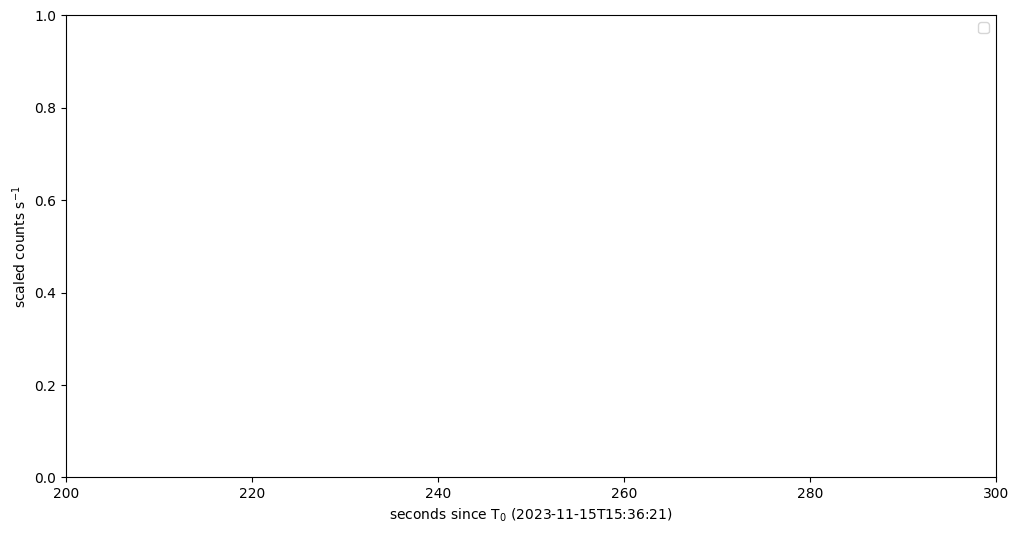

In [100]:
import re

colors = ['#1f77b4', '#ff7f0e']

def plot_spirates(ax=None):
    N = None

    groups = [
        # [
        #     'VETOSAT', 
        #     'SPI_VETOGATE', 
        #     'SPI_VETONONSAT'
        # ],
        [
            # 'GEDRATE$',
            # 'GEDSAT$',
            # 'GEDRATE$',
            # 'GEDSAT7',
            # 'GEDSAT18',
            # 'GEDRATE18',
            'GEDSAT$',
            'GEDRATE$',
            # 'GEDSAT1',
            # 'GEDRATE1',
        ],
        # ['GEDSAT0']    
    ]

    if ax is None:
        f, axes = plt.subplots(len(groups), 1, figsize=(12, 6), sharex=True)

        if len(groups) == 1:
            axes = [axes]
    else:
        axes = [ax]


    for ax, group in zip(axes, groups):
        for k in group:            
            for l, lc in hklc.items():
                if re.search(k, l):
                    if len(lc.t) < 10: continue

                    t_rel_s = (lc.t - T0_ijd)*24*3600
                    m_bkg = t_rel_s < 200
                    bkg = np.nanmean(lc.c[m_bkg])
                    s_bkg = np.nanstd(lc.c[m_bkg])
                    ev_bkg = s_bkg/bkg**0.5
                    mx = (np.nanmax(lc.c) - bkg)
                    sn = (np.nanmax(lc.c) - bkg) / s_bkg

                    if sn < 20: continue
            
                    m_n = t_rel_s > 250
                    m_n &= t_rel_s < 280
                    
                    n = np.nanmax((lc.c - bkg)[m_n])
                    if N is None:
                        N = n
                        n = 1
                        label = l
                    else:
                        n /= N
                        label = f"{l} x {int(n**-1)}"

                    # n = 1
                        
                    label += f" (EV: {ev_bkg:.2f} SD: {s_bkg:.2f} S/N {sn:.2f}) MX: {mx:.2f}" 
                    tag = "na"                    

                    if 'GEDRATE' in label:
                        label = "SPI GeD total rate < 8 MeV"
                        tag = "gedrate"
                    else:
                        label = "SPI GeD total rate > 8 MeV"
                        tag = "gedsat"

                    # bkg =0

                    # colors.append(
                    ax.step(
                        t_rel_s,
                        (lc.c - bkg)/n,
                        # lc.c**0.5,
                        # xerr=1 + np.array(lc.t)*0,
                        lw=2,
                        # ls="",
                        label=label,
                        c=colors.pop()
                    )
                    #[0].get_color())                        



    # break

plt.figure(figsize=(12, 6))

plot_spirates(plt.gca())

plt.legend()
# for ax in axes:
#     ax.legend()

# plt.sca(axes[-1])

# plt.subplots_adjust(hspace=0)


plt.xlim([200, 300])
# plt.xlim([0, 600])
# plt.xlim([0, 600])
plt.xlabel(f"seconds since T$_0$ ({T0_isot})")
plt.ylabel("scaled counts s$^{-1}$")
# axes[0].set_title("bottom: background-subtracted")
# plt.savefig("many_hk_rates.pdf")
plt.savefig("spi_rates.pdf")

#TODO: noise by sat

In [101]:
colors

['#1f77b4', '#ff7f0e']

In [102]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600
ijd2plot_d = lambda T: (T - T0_ijd)

In [103]:
T0_pointing_coord = dd['sc']['scx']
T0_pointing_coord

{'dec': 72.741, 'ra': 156.02}

In [104]:
mce = dict()

for i in range(8):
    mce[i] = pd.read_csv(
        io.StringIO(cached_session.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ISGRIRAW_MCE{i}/{T0_ijd}/2000").text), 
        skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)


np.sum([mce[i].c for i in range(8)], axis=0)

array([6792, 6626, 6770, 6614, 6593, 6328, 6616, 6808, 6785, 6747, 6677,
       6581, 6825, 6573, 6507, 6585, 6615, 6488, 6627, 6468, 6792, 6659,
       6588, 6959, 6707, 6605, 6703, 6809, 6699, 6751, 6476, 6452, 6730,
       6888, 6717, 6752, 6998, 6712, 6666, 6747, 6828, 6619, 6658, 6702,
       6564, 6647, 6674, 6736, 6594, 6716, 6661, 6648, 6893, 6750, 6785,
       6675, 6654, 6740, 6576, 6859, 6616, 6526, 6691, 6858, 6669, 6589,
       6538, 6718, 6451, 6627, 6742, 6826, 7032, 6638, 6723, 6953, 6570,
       6582, 6639, 6594, 6477, 6447, 6827, 6798, 6705, 6948, 6592, 6512,
       6518, 6539, 6648, 6484, 6640, 6741, 6783, 6698, 6562, 6529, 6548,
       6524, 6709, 6753, 6663, 6914, 6575, 6737, 6685, 6675, 6626, 6932,
       6882, 6658, 6399, 6770, 6426, 7010, 6874, 6597, 6843, 6571, 6592,
       6650, 6798, 6675, 6559, 6675, 6886, 6660, 6846, 6449, 6612, 6612,
       6444, 6966, 6664, 6446, 6607, 6444, 6733, 6448, 6725, 6746, 6534,
       6713, 6510, 6306, 6696, 6578, 6579, 6698, 66

In [128]:

spti = dict()

for i in range(1, 9):
    try:
        spti[i] = pd.read_csv(f"spti_{i}.csv")
    except Exception as e:
        print(e)        
        url = f"https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs.pl?requeststring=SPTI{i}+{T0_isot}+300&generate=genlc&submit=Submit"
        print(url)

        while True:
            spti[i] = pd.read_csv(        
                io.StringIO(requests.get(url).text), 
                skiprows=5, skipfooter=1, names=['t', 't_s0', 'c', 't_sm'], delim_whitespace=True, index_col=False)
            print(i, "got array of", len(spti[i]))
            if len(spti[i]) > 10:
                break
            time.sleep(10)

        v.to_csv(f"spti_{i}.csv")

spti_sum = np.sum([np.array(spti[i].c) for i in range(1, 9)], axis=0)

spti_1_4 = np.sum([np.array(spti[i].c) for i in range(1, 4)], axis=0)
spti_5_9 = np.sum([np.array(spti[i].c) for i in range(5, 9)], axis=0)
spti_7_9 = np.sum([np.array(spti[i].c) for i in range(7, 9)], axis=0)

spti_t = np.array(spti[1].t)

In [107]:
T0_isot

'2023-11-15T15:36:21'

In [108]:

scw_dict_prompt = pd.DataFrame(cached_session.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/{T0_ijd-1000/24/3600}/{T0_ijd+100/24/3600}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=200&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())

scw_dict_prompt

,SWID,SW_TYPE,TELAPSE,TSTART,TSTOP
0,270900370010,POINTING,5013.004195,8719.601234,8719.659255


In [109]:
# https://heasarc.gsfc.nasa.gov/docs/integral/ao19-docs-b/AO19_recommended_programme.pdf

In [110]:
# expected isgri raw rate

isgri_pixel_eff_area = u.cm**2 * 0.4*0.4 * 1 # opacity 1 approximate
isgri_mdu_eff_area = 64 * 32* isgri_pixel_eff_area 
isgri_eff_area = 128*128* isgri_pixel_eff_area 

flux_neax_peak = 5e4 * 1.5e-10 * u.erg/u.cm**2/u.s

print("expected total ISGRI RAW rate =", ((flux_neax_peak * isgri_eff_area)/(u.keV * 200)).to(u.s**-1))
print("expected total ISGRI RAW waiting time =", ((flux_neax_peak * isgri_mdu_eff_area)/(u.keV * 200)).to(u.ms**-1))

expected total ISGRI RAW rate = 61356.53080557911 1 / s
expected total ISGRI RAW waiting time = 7.669566350697389 1 / ms


first to ISGR-EVTS-ALL 2442150
first to SPI.-OSGL-ALL 2076922
bkg for ISGR-EVTS-ALL = 789.6187831622372
bkg for SPI.-OSGL-ALL = 756.2815357824969


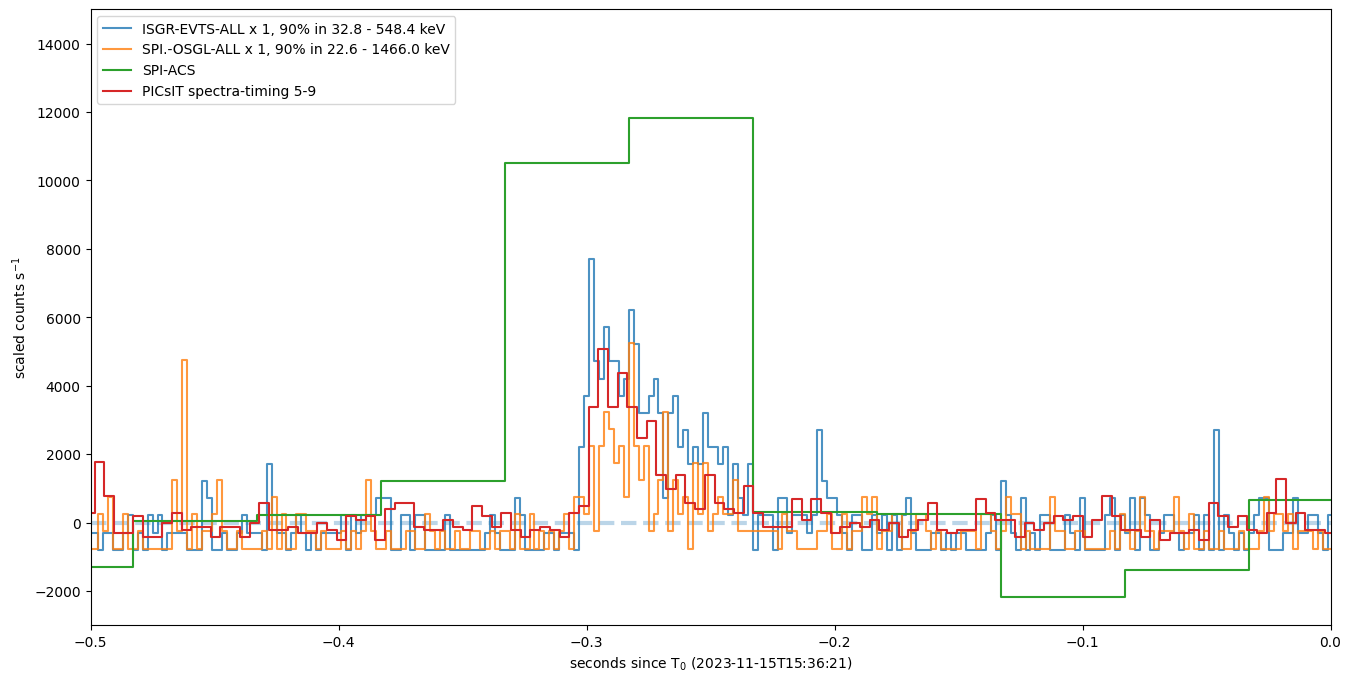

In [130]:

from collections import defaultdict


time_ranges_of_interest=[(200, 290), (490, 550)]
# time_ranges_of_interest=[(220, 280), (490, 550)]
summary_by_time_range = defaultdict(dict)


plt.figure(figsize=(16, 8))

from collections import defaultdict

hs_by_et = defaultdict(list)
cs_by_et = defaultdict(list)

compton_event_file = {}
isgri_event_file = {}
spi_event_file = {}

events_by_ext = {}


def plot_all(ax):    
    
    ax.axhline(0, lw=3, ls="--", alpha=0.3)
    
    ijd2plot = lambda T: (T - T0_ijd)*24*3600

    for i, r in scw_dict_prompt.iterrows():
        scwid = r.SWID

        # compton_event_file[scwid]  = sshopen(f"/isdc/arc/rev_3/scw/{scwid[:4]}/{scwid}.001/compton_events.fits.gz")
        # isgri_event_file[scwid]  = sshopen(f"/isdc/arc/rev_3/scw/{scwid[:4]}/{scwid}.001/isgri_events.fits.gz")    
        compton_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/compton_events.fits.gz")
        isgri_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/isgri_events.fits.gz")    
        spi_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/spi_oper.fits.gz")


        for C, color, ext in [
                        (isgri_event_file, 'y', "ISGR-EVTS-ALL"),
                        (spi_event_file, 'b', "SPI.-OSGL-ALL")
                        # (compton_event_file, 'g', "COMP-MULE-ALL"),
                        # (compton_event_file, 'r', 'COMP-SGLE-ALL')
                    ]:
            data = C[scwid][ext].data

            label=ext + " " + scwid
        



            if ijd2plot(r.TSTART) > -100:
                ax.axvline(
                    ijd2plot(r.TSTART), ls="--", c='k', alpha=0.5
                )
                # ax.axvline(
                #     ijd2plot(r.TSTOP), ls="--", c='k', alpha=0.5
                # )

                # plt.text(ijd2plot(r.TSTART), 10000, f"{scwid[6:8]}\n{scwid[10:12]}")
                # plt.text(ijd2plot(r.TSTART), 4000, scwid, rotation=90)


            # plt.axvspan(
            #     ijd2plot(r.TSTART),
            #     ijd2plot(r.TSTOP),
            #     alpha=0.2,
            #     color='red'
            # )

            if ext in events_by_ext:
                print("adding to", ext, len(data))
                events_by_ext[ext] = np.concatenate([events_by_ext[ext], data])
            else:
                print("first to", ext, len(data))
                events_by_ext[ext] = data

            
            label = None


    # F = 250
    # b = np.nanmean(hklc['SPI_GEDRATE'].c[(hklc['SPI_GEDRATE'].t - T0_ijd)*24*3600 < 200])
    # t_rel_s = ijd2plot(hklc['SPI_GEDRATE'].t)
    # c = ax.step(
    #     t_rel_s, 
    #     (hklc['SPI_GEDRATE'].c - b)*F, 
    #     # picsit_lc_1s.flux / 0.8e-9, 
    #     label=rf"SPI GeD rate x {F}"
    # )[0].get_color()
   

    # for r_t1, r_t2 in time_ranges_of_interest:
    #     ax.axvspan(r_t1, r_t2, color='k', alpha=0.1)
    #     total_counts = np.nansum(hklc['SPI_GEDRATE'].c[(t_rel_s > r_t1) & (t_rel_s < r_t2)] - b)
    #     print(f"gedrate {total_counts} {r_t1} {r_t2} {total_counts:g}")
    #     summary_by_time_range['gedrate'][(r_t1, r_t2)] = total_counts

        # plt.axvspan(ijd2plot(r_t1), ijd2plot(r_t2), color=c, alpha=0.2)


    for ext, data in events_by_ext.items():
        T = data['TIME']

        Ei = 0
        Ep = 0

        try:
            Ei = data['ISGRI_ENERGY']            
        except:
            pass
        
        try:
            Ep = data['PICSIT_ENERGY']
        except:
            pass

        Ec = Ei + Ep

        if 'SPI' in ext:
            Ec = data['ENERGY']

        tbin = 0.002

        e_p5, e_p95 = np.nanpercentile(Ec, [5, 95])

        h = np.histogram(ijd2plot(T), bins=np.linspace(-10, 800, int(810/tbin)))
        dt = (h[1][1:] - h[1][:-1])
        tc = (h[1][1:] + h[1][:-1]) / 2.
        rate = h[0] / dt

        
        scale = {"ISGR-EVTS-ALL": 1,
                 "SPI.-OSGL-ALL": 1,
                "COMP-MULE-ALL": 400,
                'COMP-SGLE-ALL': 20 }[ext]
        
        b = np.mean(rate[(tc < 150) & (tc > 50) & (rate>0)])

        print("bkg for", ext, "=", b)

        N = np.sum(((rate - b)*dt)[(rate - b>0) & (tc > 100) & (tc <700)])
        
        # ax.step(tc, (rate - b)*scale, alpha=0.8, label=f"{ext} x {scale:d}. {N:.0f} events")
        ax.step(tc, (rate - b)*scale, alpha=0.8, label=f"{ext} x {scale:d}, 90% in {e_p5:.1f} - {e_p95:.1f} keV")
        
    ijd2plot = lambda t:(t- T0_ijd)*24*3600

    # acs_cts2es = 1.5e-10

    b = np.mean(acslc.c[(acslc.t- T0_ijd)*24*3600 < 200])
    ax.step(ijd2plot(acslc.t), (acslc.c - b)*20, label="SPI-ACS", where='mid')

    # b = np.mean(spti_sum[(spti_t - T0_ijd)*24*3600 < 200])
    # ax.step(ijd2plot(spti_t), (spti_sum - b)*100, label="PICsIT spectra-timing total", where='mid')

    # b = np.mean(spti_7_9[(spti_t - T0_ijd)*24*3600 < 200])
    # ax.step(ijd2plot(spti_t), (spti_7_9 - b)*100, label="PICsIT spectra-timing 1-4", where='mid')

    b = np.mean(spti_5_9[(spti_t - T0_ijd)*24*3600 < 200])
    ax.step(ijd2plot(spti_t), (spti_5_9 - b)*100, label="PICsIT spectra-timing 5-9", where='mid')

    # for r_t1, r_t2 in time_ranges_of_interest:
    #     ax.axvspan(r_t1, r_t2, color='k', alpha=0.1)
    #     total_counts = np.nansum(acslc.c[(acslc.t - T0_ijd)*24*3600 > r_t1] - b)
    #     print(f"SPI-ACS {r_t1} {r_t2} {total_counts:g}")
    #     summary_by_time_range['acs'][(r_t1, r_t2)] = total_counts

    # isgri_raw_total_rate = np.sum([mce[i].c for i in range(8)], axis=0 )
    # b = np.mean(isgri_raw_total_rate[(mce[0].t- T0_ijd)*24*3600 < 200])
    # F = 10
    # ax.step((mce[0].t- T0_ijd)*24*3600, isgri_raw_total_rate - b, label=f"ISGRI RAW rate x {F}", where='post')

    # picsit

   

    # plt.axhspan(-1e10, 0, color='k', alpha=0.2)
    ax.set_ylim([-3e3, 15e3])

    ax.set_xlabel(f"seconds since T$_{{0}}$ ({T0_isot})")
    ax.set_ylabel("scaled counts s$^{-1}$")


    # F = 1000
    # b = np.nanmean(hklc['SPI_GEDSAT0'].c[(hklc['SPI_GEDSAT0'].t - T0_ijd)*24*3600 < 200])
    # c = ax.step(
    #     ijd2plot(hklc['SPI_GEDSAT0'].t), 
    #     (hklc['SPI_GEDSAT0'].c - b)*F, 
    #     # picsit_lc_1s.flux / 0.8e-9, 
    #     label=rf"SPI SAT rate x {F}"
    # )[0].get_color()

    # # plt.axhspan(-1e10, 0, color='k', alpha=0.2)
    # ax.set_ylim([-1e4, 6e4])

    # ax.set_xlabel(f"seconds since {T0_isot}")
    # ax.set_ylabel(f"counts s$^{-1}$")
    
plot_all(plt.gca())

# axy2 = plt.twinx()
# axy2.plot(ijd2plot(att_hist['TIME']), scx.separation(src_coord).deg)
# axy2.scatter(ijd2plot(att_hist['TIME']), scx.separation(src_coord).deg)
# axy2.set_ylim([60,75])

# plt.grid(False)

plt.legend(loc="upper left")
# plt.ylim([-5e4, 6e7])
plt.xlim([-0.5, 0])

# plt.xlim([250, 400])
# plt.savefig("figs/prompt_p1.pdf")

# plt.xlim([-10, 10])
# plt.ylim([-1e3, 1e3])
# plt.savefig("figs/precursor.pdf")


# bax = plt.gca()

# plt.xlim([-40, 1000])

# # plt.xlim([150, 600])
# # plt.xlim([270, 300])

# # plt.xlim([450, 600])
# plt.ylim([-2.5e5, 35e5])


# ax = plt.gca().inset_axes([580, 8e5, 400, 2.5e6], transform=plt.gca().transData)
# # ax = plt.gca().inset_axes([350, 1e5, 600, 5e5], transform=plt.gca().transData)


# plot_all(ax) #, ['compton'])
# ax.set_ylim([-2e5, 5.2e7])
# ax.set_ylim([-1e5, 7e5])

# F = 50
# b = np.nanmean(hklc['SPI_GEDRATE0'].c[(hklc['SPI_GEDRATE0'].t - T0_ijd)*24*3600 < 200])
# ax.step(
#     ijd2plot(hklc['SPI_GEDRATE0'].t), 
#     (hklc['SPI_GEDRATE0'].c - b)*F, 
#     # picsit_lc_1s.flux / 0.8e-9, 
#     label=rf"SPI rate x {F}",
#     c=c
# )

# ax.set_xlim(bax.get_xlim())
# ax.set_xlabel(None)

plt.savefig("figs/prompt.pdf")


# ax = plt.gca().inset_axes([-80, 6e5, 220, 1.7e6], transform=plt.gca().transData)
# plot_spirates(ax)
# ax.set_xlim(bax.get_xlim())
# ax.set_xlim([200, 300])

# plt.xlim([300, 310])
# plt.ylim([-0.5e3, 3e3])


# TODO: also show early one
# TODO: search for smaller excesses allover
# TODO: check if saturation is by ISGRI module, else why smooth transitions in compton rate
# TODO: search for long-term in compton, good sensitivity
# TODO: check detector plane near compton saturations, module?

# TODO: spi-acs would have seen is as a short spike

In [112]:
list(spi_event_file.values())[0]['SPI.-OSGL-ALL']

In [113]:
guess_fluence = 1e-8 * u.erg/u.cm**2 
distance = 3.5 * u.Mpc
totalenergy = guess_fluence * 4*np.pi*distance**2
totalenergy.to(u.erg)

<Quantity 1.4657066e+43 erg>

In [114]:

# for scwid in isgri_event_file.keys():
#     for d, n in [(isgri_event_file[scwid][3].data, 'isgri'), (compton_event_file[scwid]['COMP-SGLE-ALL'].data, 'compton')]:
#         plt.figure()

#         m = d['TIME'] > T0_ijd + 150./3600./24
#         m &= d['TIME'] < T0_ijd + 550/3600./24

#         _ = plt.hist2d(d['ISGRI_Y'][m], d['ISGRI_Z'][m], (128, 128))
#         plt.title(f"{scwid} {n}")

In [115]:
# !pip install tables

In [116]:
with  pd.HDFStore("hklc.h5", "w") as store:

    for k, v in hklc.items():
        v.to_hdf(store, k)


In [117]:
scw_dict_prompt['tstart_since_t0_s'] = ijd2plot(scw_dict_prompt.TSTART)
scw_dict_prompt['tstop_since_t0_s'] = ijd2plot(scw_dict_prompt.TSTOP)

In [118]:
dd['sc']['bodies']['earth']['separation']

150521.4

In [119]:
time_ranges_of_interest

[(200, 290), (490, 550)]

In [120]:
hklc_h5="hklc.h5"
lc_pdf="figs/prompt.pdf"
lc_p1_pdf="figs/prompt_p1.pdf"
spi_rates_lc_pdf="spi_rates.pdf"
T0_isot=T0_isot
data=dict(dd)
scws=scw_dict_prompt.to_dict()
T0_pointing_coord=dd['sc']['scx']
sc=dd['sc']
sc_second_pointing=dd['sc_second_pointing']
acs_saturation=acs_saturation
ged_episode_ratio=ged_episode_ratio
acs_fluence_second=acs_fluence_second
fluence_estimate=fluence_estimate
troi_1_t1 = time_ranges_of_interest[0][0]
troi_1_t2 = time_ranges_of_interest[0][1]
troi_2_t1 = time_ranges_of_interest[1][0]
troi_2_t2 = time_ranges_of_interest[1][1]

KeyError: 'sc_second_pointing'